# FlowKit Tutorial

## Classes

* Sample
* Matrix
* GatingStrategy
* Session

## Sub-modules

* gates
* transforms

## Requirements

* flowio
* flowutils
* matplotlib
* scipy
* seaborn
* pandas
* numpy
* lxml
* bokeh
* anytree
* graphviz (optional, for saving gating hierarchies as images)

## Not Implemented (yet...)

* Mixed channel compensation

## References

*Bagwell CB. Hyperlog-a flexible log-like transform for negative, zero,
and positive valued data. Cytometry A., 2005:64(1):34–42.*

*Parks DR, Roederer M, Moore WA. A new “Logicle” display method avoids deceptive effects of logarithmic scaling for low signals and compensated data. Cytometry., 2006:69: 541-545*

*Moller T, Haines E. Ray/Polygon Intersection, Real-Time Rendering (3rd Edition), 2008*

*http://geomalgorithms.com/a03-_inclusion.html*


## Let's get started...

In [1]:
import bokeh
from bokeh.plotting import show
import matplotlib.pyplot as plt

import flowkit as fk

bokeh.io.output_notebook()
%matplotlib inline

Loading BokehJS ...

### Most classes and methods have been documented: 

In [2]:
help(fk.Sample)

Help on class Sample in module flowkit._models.sample:

class Sample(builtins.object)
 |  Sample(fcs_path_or_data, channel_labels=None, compensation=None, null_channel_list=None)
 |  
 |  Represents a single FCS sample from an FCS file, NumPy array or Pandas
 |  DataFrame.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fcs_path_or_data, channel_labels=None, compensation=None, null_channel_list=None)
 |      Create a Sample instance
 |      
 |      :param fcs_path_or_data: FCS data, can be either:
 |              - a file path or file handle to an FCS file
 |              - a pathlib Path object
 |              - a FlowIO FlowData object
 |              - a NumPy array of FCS event data (must provide channel_labels)
 |              - a Pandas DataFrame containing FCS event data (channel labels as headers)
 |      :param channel_labels: A list of strings or a list of tuples to use for the channel
 |          labels. Required if fcs_path_or_data is a NumPy array
 |      :param co

## Sample

A Sample object can conveniently be created in multiple ways:
    
    * A file path to an FCS file
    * A pathlib Path object to an FCS file
    * An already instantiated FlowIO FlowData object 
    * A NumPy array (provided the channel_labels argument is given)
    * A Pandas DataFrame (with channel labels as headers)

When creating a Sample instance, several optional arguments are available, including specifying a compensation matrix and declaring null channels. The `channel_labels` argument is used (and required) if loading data from a NumPy array. Below, we create a Sample instance via a file path to an FCS file:

In [3]:
fcs_path = '../examples/gate_ref/data1.fcs'

In [4]:
sample = fk.Sample(fcs_path)

In [5]:
sample

Sample(v2.0, B07, 8 channels, 13367 events)

### Sub-sampling a Sample for performance

FlowKit is optimized (or attempts to be!) for performance. However, when dealing with high-dimensional flow cytometry data or with data containing millions of events, it can be useful to sub-sample events to speed up processing. FlowKit sub-samples events randomly, but in a reproducible way. You can be guaranteed the same sub-sample indices when re-running analysis. Further, sub-sampling does not delete any events, the sub-sampled indices are simply stored to use as a subset of events. Any Sample class method that processes or retrieves events will have a `subsample` argument that takes a Boolean value specifying whether to use the sub-sampled events or all events.

Next, we will sub-sample our FCS data to 10,000 events, statistically giving us the capability of resolving rare cell subsets to 0.01%. We can retrieve the subsampled indices using the `subsample_indices` attribute.

In [6]:
sample.subsample_events(subsample_count=10000)

In [7]:
sample.subsample_indices

array([ 4136, 12180, 11048, ...,  9661, 10709, 10093])

### FCS Metadata and Channel Information

#### Get the FCS version of the file (returns None if a Sample was created from a NumPy array or Pandas DataFrame)

In [8]:
sample.version

2.0

#### Retrieve all the FCS metadata:

In [9]:
sample.get_metadata()

{'byteord': '4,3,2,1',
 'datatype': 'I',
 'nextdata': '0',
 'sys': 'Macintosh System Software 9.0.4',
 'creator': 'CELLQuestª 3.3',
 'tot': '13367',
 'mode': 'L',
 'par': '8',
 'p1n': 'FSC-H',
 'p1r': '1024',
 'p1b': '16',
 'p1e': '0,0',
 'p1g': '3.67',
 'p2n': 'SSC-H',
 'p2r': '1024',
 'p2b': '16',
 'p2e': '0,0',
 'p2g': '8',
 'p3n': 'FL1-H',
 'p3r': '1024',
 'p3b': '16',
 'p3e': '4,0',
 'p4n': 'FL2-H',
 'p4r': '1024',
 'p4b': '16',
 'p4e': '4,0',
 'p5n': 'FL3-H',
 'p5r': '1024',
 'p5b': '16',
 'p5e': '4,0',
 'p1s': 'FSC-Height',
 'p2s': 'SSC-Height',
 'p3s': 'CD4 FITC',
 'p4s': 'CD8 B PE',
 'p5s': 'CD3 PerCP',
 'p6n': 'FL2-A',
 'p6r': '1024',
 'p6b': '16',
 'p6e': '0,0',
 'timeticks': '100',
 'p7n': 'FL4-H',
 'p7r': '1024',
 'p7e': '4,0',
 'p7b': '16',
 'p7s': 'CD8 APC',
 'p8n': 'Time',
 'p8r': '1024',
 'p8e': '0,0',
 'p8b': '16',
 'p8s': 'Time (102.40 sec.)',
 'sample id': 'Default Patient ID',
 'src': 'Default',
 'case number': 'Default Case Number',
 'cyt': 'FACSCalibur',
 'cytnum

#### Retrieve a dictionary of the required PnN labels & optional PnS labels for each channel. Note that Samples distinguish between channel numbers and indices, with channel numbers being indexed at 1 and channel indices being indexed at 0. The `channels` attribute yields the labels with keys as the channel numbers:

In [10]:
sample.channels

{'1': {'PnN': 'FSC-H', 'PnS': 'FSC-Height'},
 '2': {'PnN': 'SSC-H', 'PnS': 'SSC-Height'},
 '3': {'PnN': 'FL1-H', 'PnS': 'CD4 FITC'},
 '4': {'PnN': 'FL2-H', 'PnS': 'CD8 B PE'},
 '5': {'PnN': 'FL3-H', 'PnS': 'CD3 PerCP'},
 '6': {'PnN': 'FL2-A'},
 '7': {'PnN': 'FL4-H', 'PnS': 'CD8 APC'},
 '8': {'PnN': 'Time', 'PnS': 'Time (102.40 sec.)'}}

#### Get a list of only the PnN labels:

In [11]:
sample.pnn_labels

['FSC-H', 'SSC-H', 'FL1-H', 'FL2-H', 'FL3-H', 'FL2-A', 'FL4-H', 'Time']

#### The optional PnS labels are available too (empty values will be empty strings):

In [12]:
sample.pns_labels

['FSC-Height',
 'SSC-Height',
 'CD4 FITC',
 'CD8 B PE',
 'CD3 PerCP',
 '',
 'CD8 APC',
 'Time (102.40 sec.)']

#### A Sample knows which indices belong to fluorescent channels:

In [13]:
sample.fluoro_indices

[2, 3, 4, 5, 6]

#### Lookup a channel index by a label string:

In [14]:
sample.get_channel_index('FL2-H')

3

#### Or, lookup a channel number:

In [15]:
sample.get_channel_number_by_label('FL2-H')

4

#### And, just so you don't have to write any lookup code, you can get a channel index via its number:

In [16]:
sample.get_channel_index(4)

3

#### To get the event count:

In [17]:
sample.event_count

13367

#### Several other Sample attributes are available including: 

* `acquisition_date`
* `original_filename`
* `subsample_indices`
* `anomolous_indices`
* `compensation`

### Plotting Sample Events

* Histogram
* Contour Plot
* Interactive Scatter Plot
* Interactive Scatter Plot Matrix

For all plotting methods, the `source` argument determines whether the original events ('raw'), compensated events ('comp'), or transformed events ('xform') are displayed. Note, transformed events will be displayed post-compensation if a compensation matrix was supplied when creating a Sample instance or if the `apply_compensation` method has been called. Transformations can be applied to a non-compensated Sample.

All plotting methods return a figure of either a Seaborn or Bokeh instance. This is done so the caller can modify and/or display the plot as required.

### Histogram

In [18]:
help(sample.plot_histogram)

Help on method plot_histogram in module flowkit._models.sample:

plot_histogram(channel_label_or_number, source='xform', subsample=False, bins=None) method of flowkit._models.sample.Sample instance
    Returns a histogram plot of the specified channel events, available
    as raw, compensated, or transformed data. Plot also contains a curve
    of the gaussian kernel density estimate.
    
    :param channel_label_or_number:  A channel's PnN label or number to use
        for plotting the histogram
    :param source: 'raw', 'comp', 'xform' for whether the raw, compensated
        or transformed events are used for plotting
    :param subsample: Whether to use all events for plotting or just the
        sub-sampled events. Default is False (all events). Plotting
        sub-sampled events can be much faster.
    :param bins: Number of bins to use for the histogram. If None, the
        number of bins is determined by the Freedman-Diaconis rule.
    :return: Matplotlib figure of the hist

In [19]:
p = sample.plot_histogram('FSC-H', source='raw')
show(p)

#### Changing the bin size:

In [20]:
p = sample.plot_histogram('FSC-H', source='raw', bins=256)
show(p)

### Contour Plot

In [21]:
help(sample.plot_contour)

Help on method plot_contour in module flowkit._models.sample:

plot_contour(x_label_or_number, y_label_or_number, source='xform', subsample=False, plot_contour=True, plot_events=False, x_min=None, x_max=None, y_min=None, y_max=None, fig_size=(8, 8)) method of flowkit._models.sample.Sample instance
    Returns a contour plot of the specified channel events, available
    as raw, compensated, or transformed data.
    
    :param x_label_or_number:  A channel's PnN label or number for x-axis
        data
    :param y_label_or_number: A channel's PnN label or number for y-axis
        data
    :param source: 'raw', 'comp', 'xform' for whether the raw, compensated
        or transformed events are used for plotting
    :param subsample: Whether to use all events for plotting or just the
        sub-sampled events. Default is False (all events). Plotting
        sub-sampled events can be much faster.
    :param plot_contour: Whether to display the contour lines. Default is True.
    :param p

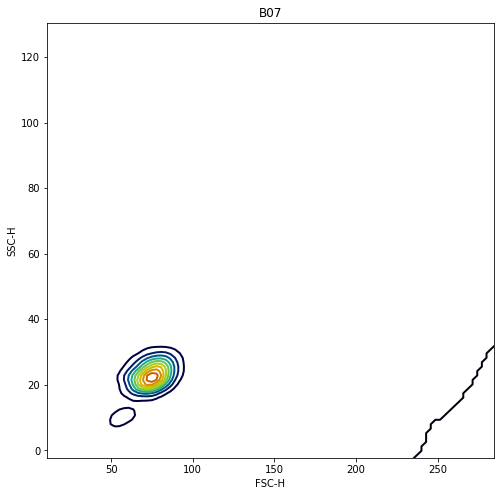

In [22]:
f = sample.plot_contour('FSC-H', 'SSC-H', source='raw')

In [23]:
plt.show()

#### Adding events for a non-interactive scatter plot (but not as fast as the true scatter plot method):

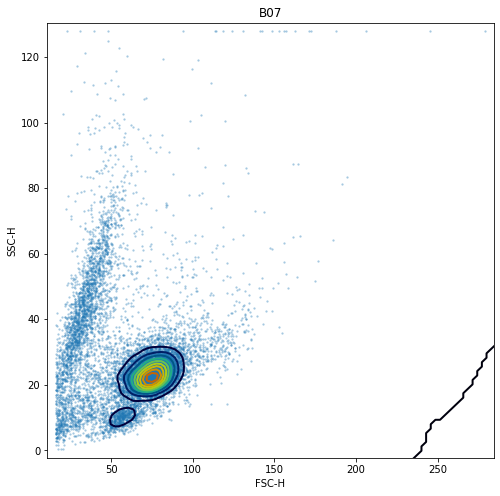

In [24]:
f = sample.plot_contour('FSC-H', 'SSC-H', source='raw', plot_events=True)
plt.show()

### Interactive Scatter Plot

In [25]:
p = sample.plot_scatter('FSC-H', 'SSC-H', source='raw')

In [26]:
show(p)

#### Turn off the color density:

In [27]:
p = sample.plot_scatter('FSC-H', 'SSC-H', source='raw', color_density=False)
show(p)

#### Apply a transform and plot fluorescent channels (raw and transformed):

In [28]:
xform = fk.transforms.AsinhTransform('asinh', param_t=10000, param_m=4.5, param_a=0)
sample.apply_transform(xform)

In [29]:
p = sample.plot_scatter('FL1-H', 'FL2-H', source='raw')
show(p)

In [30]:
p = sample.plot_scatter('FL1-H', 'FL2-H', source='xform')
show(p)

### Interactive Scatterplot Matrix

In [31]:
help(sample.plot_scatter_matrix)

Help on method plot_scatter_matrix in module flowkit._models.sample:

plot_scatter_matrix(source='xform', subsample=False, channel_labels_or_numbers=None, color_density=False, plot_height=256, plot_width=256) method of flowkit._models.sample.Sample instance
    Returns an interactive scatter plot matrix for all channel combinations
    except for the Time channel.
    
    :param source: 'raw', 'comp', 'xform' for whether the raw, compensated
        or transformed events are used for plotting
    :param subsample: Whether to use all events for plotting or just the
        sub-sampled events. Default is False (all events). Plotting
        sub-sampled events can be much faster.
    :param channel_labels_or_numbers: List of channel PnN labels or channel
        numbers to use for the scatter plot matrix. If None, then all
        channels will be plotted (except Time).
    :param color_density: Whether to color the events by density, similar
        to a heat map. Default is False.
    

In [32]:
spm = sample.plot_scatter_matrix(
    source='xform', 
    channel_labels_or_numbers=['FSC-H', 'SSC-H', 'FL3-H', 'FL4-H'],
    color_density=True)
show(spm)

## GatingStrategy

A GatingStrategy object is created from a valid GatingML document. The interface is simple as there is a single method `gate_sample` that takes a Sample instance and an optional `gate_id` text string identifying a gate. If no `gate_id` is specified the method evaluates and returns all gates in the gating strategy.

In [33]:
help(fk.GatingStrategy)

Help on class GatingStrategy in module flowkit._models.gating_strategy:

class GatingStrategy(builtins.object)
 |  Represents an entire flow cytometry gating strategy, including instructions
 |  for compensation and transformation. Takes an optional, valid GatingML
 |  document as an input.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add_comp_matrix(self, matrix)
 |  
 |  add_gate(self, gate)
 |  
 |  add_transform(self, transform)
 |  
 |  cache_compensated_events(self, sample, comp_ref, comp_events)
 |  
 |  export_gate_hierarchy_image(self, output_file_path)
 |      Saves an image of the gate hierarchy in many common formats
 |      according to the extension given in `output_file_path`, including
 |        - SVG  ('svg')
 |        - PNG  ('png')
 |        - JPEG ('jpeg', 'jpg')
 |        - TIFF ('tiff', 'tif')
 |        - GIF  ('gif')
 |     

In [34]:
gml_path = '../examples/gate_ref/gml/gml_all_gates.xml'

In [35]:
g_strat = fk.parse_gating_xml(gml_path)

In [36]:
g_strat

GatingStrategy(42 gates, 9 transforms, 1 compensations)

#### Retrieve all the gates

In [37]:
g_strat.gates

{'Range1': GMLRectangleGate(Range1, parent: None, dims: 1),
 'Rectangle1': GMLRectangleGate(Rectangle1, parent: None, dims: 2),
 'Rectangle2': GMLRectangleGate(Rectangle2, parent: None, dims: 2),
 'Range2': GMLRectangleGate(Range2, parent: None, dims: 1),
 'RatRange1': GMLRectangleGate(RatRange1, parent: None, dims: 1),
 'RatRange2': GMLRectangleGate(RatRange2, parent: None, dims: 1),
 'RatRange1a': GMLRectangleGate(RatRange1a, parent: None, dims: 1),
 'Rectangle3': GMLRectangleGate(Rectangle3, parent: None, dims: 2),
 'Rectangle4': GMLRectangleGate(Rectangle4, parent: None, dims: 2),
 'Rectangle5': GMLRectangleGate(Rectangle5, parent: None, dims: 2),
 'ScaleRange1': GMLRectangleGate(ScaleRange1, parent: None, dims: 1),
 'ScaleRange2': GMLRectangleGate(ScaleRange2, parent: None, dims: 1),
 'ScaleRange3': GMLRectangleGate(ScaleRange3, parent: None, dims: 1),
 'ScaleRange4': GMLRectangleGate(ScaleRange4, parent: None, dims: 1),
 'ScaleRange5': GMLRectangleGate(ScaleRange5, parent: None, 

#### Retrieve all the compensation matrices

In [38]:
g_strat.comp_matrices

{'MySpill': Matrix(MySpill, dims: 3)}

#### And, all the transformations

In [39]:
g_strat.transformations

{'FL2Rat1': RatioGMLTransform(t: 1.0, w: 0.0, c: -1.0),
 'FL2Rat2': RatioGMLTransform(t: 2.7, w: -100.0, c: -300.0),
 'MyRatLog': LogGMLTransform(MyRatLog, t: 100.0, m: 2.0),
 'AsinH_10000_4_1': AsinhGMLTransform(AsinH_10000_4_1, t: 10000.0, m: 4.0, a: 1.0),
 'Hyperlog_10000_1_4.5_0': HyperlogGMLTransform(Hyperlog_10000_1_4.5_0, t: 10000.0, w: 1.0,m: 4.5, a: 0.0),
 'Linear_10000_500': LinearGMLTransform(Linear_10000_500, t: 10000.0, a: 500.0),
 'Logicle_10000_0.5_4.5_0': LogicleGMLTransform(Logicle_10000_0.5_4.5_0, t: 10000.0, w: 0.5,m: 4.5, a: 0.0),
 'Logicle_10000_1_4_0.5': LogicleGMLTransform(Logicle_10000_1_4_0.5, t: 10000.0, w: 1.0,m: 4.0, a: 0.5),
 'Logarithmic_10000_5': LogGMLTransform(Logarithmic_10000_5, t: 10000.0, m: 5.0)}

#### Visualize the gate hierarchy as ASCII text, JSON, dictionary, or an image

In [40]:
text = g_strat.get_gate_hierarchy('ascii')

In [41]:
print(text)

root
├── Range1
│   ╰── ParAnd3
├── Rectangle1
├── Rectangle2
├── Range2
├── RatRange1
├── RatRange2
├── RatRange1a
├── Rectangle3
├── Rectangle4
├── Rectangle5
├── ScaleRange1
├── ScaleRange2
├── ScaleRange3
├── ScaleRange4
├── ScaleRange5
├── ScaleRange6
├── ScaleRange1c
├── ScaleRange2c
├── ScaleRange3c
├── ScaleRange4c
├── ScaleRange5c
├── ScaleRect1
│   ╰── ScalePar1
├── ScaleRange6c
├── ScaleRange7c
├── ScaleRange8c
├── Polygon1
│   ╰── ParAnd2
├── Polygon2
├── Polygon3NS
├── Polygon4
├── Ellipse1
├── Quadrant1
│   ├── FL2P-FL4P
│   ├── FL2N-FL4P
│   ├── FL2N-FL4N
│   ╰── FL2P-FL4N
├── Quadrant2
│   ├── FSCN-SSCN
│   ├── FSCD-SSCN-FL1N
│   ├── FSCP-SSCN-FL1N
│   ├── FSCD-FL1P
│   ╰── FSCN-SSCP-FL1P
├── And1
├── And2
├── Or1
├── And3
├── Not1
├── And4
╰── Or2


In [42]:
gs_json = g_strat.get_gate_hierarchy('json')

In [43]:
print(gs_json)

{"name": "root", "children": [{"name": "Range1", "children": [{"name": "ParAnd3"}]}, {"name": "Rectangle1"}, {"name": "Rectangle2"}, {"name": "Range2"}, {"name": "RatRange1"}, {"name": "RatRange2"}, {"name": "RatRange1a"}, {"name": "Rectangle3"}, {"name": "Rectangle4"}, {"name": "Rectangle5"}, {"name": "ScaleRange1"}, {"name": "ScaleRange2"}, {"name": "ScaleRange3"}, {"name": "ScaleRange4"}, {"name": "ScaleRange5"}, {"name": "ScaleRange6"}, {"name": "ScaleRange1c"}, {"name": "ScaleRange2c"}, {"name": "ScaleRange3c"}, {"name": "ScaleRange4c"}, {"name": "ScaleRange5c"}, {"name": "ScaleRect1", "children": [{"name": "ScalePar1"}]}, {"name": "ScaleRange6c"}, {"name": "ScaleRange7c"}, {"name": "ScaleRange8c"}, {"name": "Polygon1", "children": [{"name": "ParAnd2"}]}, {"name": "Polygon2"}, {"name": "Polygon3NS"}, {"name": "Polygon4"}, {"name": "Ellipse1"}, {"name": "Quadrant1", "children": [{"name": "FL2P-FL4P"}, {"name": "FL2N-FL4P"}, {"name": "FL2N-FL4N"}, {"name": "FL2P-FL4N"}]}, {"name": "

In [44]:
gs_dict = g_strat.get_gate_hierarchy('dict')

In [45]:
gs_dict

{'name': 'root',
 'children': [{'name': 'Range1', 'children': [{'name': 'ParAnd3'}]},
  {'name': 'Rectangle1'},
  {'name': 'Rectangle2'},
  {'name': 'Range2'},
  {'name': 'RatRange1'},
  {'name': 'RatRange2'},
  {'name': 'RatRange1a'},
  {'name': 'Rectangle3'},
  {'name': 'Rectangle4'},
  {'name': 'Rectangle5'},
  {'name': 'ScaleRange1'},
  {'name': 'ScaleRange2'},
  {'name': 'ScaleRange3'},
  {'name': 'ScaleRange4'},
  {'name': 'ScaleRange5'},
  {'name': 'ScaleRange6'},
  {'name': 'ScaleRange1c'},
  {'name': 'ScaleRange2c'},
  {'name': 'ScaleRange3c'},
  {'name': 'ScaleRange4c'},
  {'name': 'ScaleRange5c'},
  {'name': 'ScaleRect1', 'children': [{'name': 'ScalePar1'}]},
  {'name': 'ScaleRange6c'},
  {'name': 'ScaleRange7c'},
  {'name': 'ScaleRange8c'},
  {'name': 'Polygon1', 'children': [{'name': 'ParAnd2'}]},
  {'name': 'Polygon2'},
  {'name': 'Polygon3NS'},
  {'name': 'Polygon4'},
  {'name': 'Ellipse1'},
  {'name': 'Quadrant1',
   'children': [{'name': 'FL2P-FL4P'},
    {'name': 'FL2

#### Exporting the gate hierarchy as an image requires the `graphviz` package

In [46]:
g_strat.export_gate_hierarchy_image('gs.png')

In [47]:
img = plt.imread('gs.png')

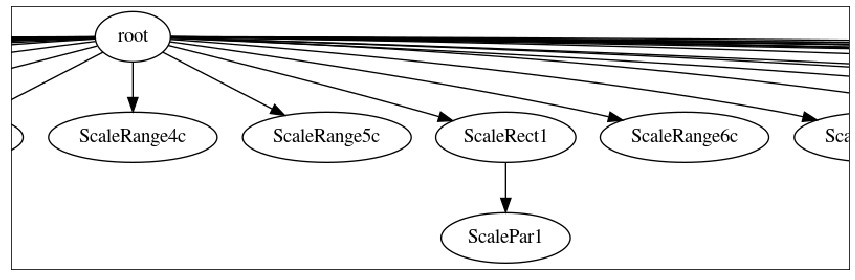

In [48]:
f = plt.figure(figsize=(16, 4))
ax = f.subplots(1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.imshow(img[:, 3100:3900], aspect='equal', interpolation='nearest')
plt.tight_layout()
plt.show()

#### Get results from a single gate using its ID

In [49]:
gs_results = g_strat.gate_sample(sample, gate_id='And1')

In [50]:
help(gs_results)

Help on GatingResults in module flowkit._models.gating_strategy object:

class GatingResults(builtins.object)
 |  GatingResults(results_dict, sample_id)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, results_dict, sample_id)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_gate_absolute_percent(self, gate_id)
 |  
 |  get_gate_count(self, gate_id)
 |  
 |  get_gate_indices(self, gate_id)
 |  
 |  get_gate_relative_percent(self, gate_id)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [51]:
gs_results.report

gate_type quadrant_parent parent  count  absolute_percent  \
sample gate_id                                                                
B07    And1     BooleanGate            None   None    561          4.196903   

                relative_percent  
sample gate_id                    
B07    And1             4.196903

In [52]:
gs_results.get_gate_indices('And1')

array([False, False, False, ..., False, False, False])

#### Or, multiple gates using a list of IDs

In [53]:
gs_results = g_strat.gate_sample(sample, gate_id=['And1', 'Polygon2'])

In [54]:
gs_results.report

gate_type quadrant_parent parent  count  absolute_percent  \
sample gate_id                                                                 
B07    And1      BooleanGate            None   None    561          4.196903   
       Polygon2  PolygonGate            None   None    183          1.369043   

                 relative_percent  
sample gate_id                     
B07    And1              4.196903  
       Polygon2          1.369043

#### All the gates are evaluated if no gate IDs are given

In [55]:
gs_results = g_strat.gate_sample(sample)

In [56]:
gs_results.report

gate_type quadrant_parent      parent  count  \
sample gate_id                                                            
B07    And1              BooleanGate            None        None    561   
       And2              BooleanGate            None        None     12   
       And3              BooleanGate            None        None    120   
       And4              BooleanGate            None        None    120   
       Ellipse1        EllipsoidGate            None        None    203   
       FL2N-FL4N        QuadrantGate       Quadrant1        None   5148   
       FL2N-FL4P        QuadrantGate       Quadrant1        None    238   
       FL2P-FL4N        QuadrantGate       Quadrant1        None   7361   
       FL2P-FL4P        QuadrantGate       Quadrant1        None    620   
       FSCD-FL1P        QuadrantGate       Quadrant2        None   2978   
       FSCD-SSCN-FL1N   QuadrantGate       Quadrant2        None    755   
       FSCN-SSCN        QuadrantGate       Quadrant2        None    398   
       FSCN-SSCP-FL1P   QuadrantGate       Quadrant2        None     59   
       FSCP-SSCN-FL1N   QuadrantGate       Quadrant2        None     96   
       Not1              BooleanGate            None        None  13164   
       Or1               BooleanGate            None        None   1983   
       Or2               BooleanGate            None        None   8283   
       ParAnd2           BooleanGate            None    Polygon1     12   
       ParAnd3           BooleanGate            None      Range1    120   
       Polygon1          PolygonGate            None        None   1582   
       Polygon2          PolygonGate            None        None    183   
       Polygon3NS        PolygonGate            None        None   1325   
       Polygon4          PolygonGate            None        None    716   
       Range1          RectangleGate            None        None    440   
       Range2          RectangleGate            None        None   4710   
       RatRange1       RectangleGate            None        None   7679   
       RatRange1a      RectangleGate            None        None   7865   
       RatRange2       RectangleGate            None        None   3398   
       Rectangle1      RectangleGate            None        None    252   
       Rectangle2      RectangleGate            None        None    252   
       Rectangle3      RectangleGate            None        None   6446   
       Rectangle4      RectangleGate            None        None   1275   
       Rectangle5      RectangleGate            None        None   1303   
       ScalePar1       RectangleGate            None  ScaleRect1    558   
       ScaleRange1     RectangleGate            None        None   8425   
       ScaleRange1c    RectangleGate            None        None   6916   
       ScaleRange2     RectangleGate            None        None    850   
       ScaleRange2c    RectangleGate            None        None    789   
       ScaleRange3     RectangleGate            None        None   3181   
       ScaleRange3c    RectangleGate            None        None   2309   
       ScaleRange4     RectangleGate            None        None   2509   
       ScaleRange4c    RectangleGate            None        None   1873   
       ScaleRange5     RectangleGate            None        None   1840   
       ScaleRange5c    RectangleGate            None        None   1436   
       ScaleRange6     RectangleGate            None        None   8351   
       ScaleRange6c    RectangleGate            None        None   4113   
       ScaleRange7c    RectangleGate            None        None  12478   
       ScaleRange8c    RectangleGate            None        None   6263   
       ScaleRect1      RectangleGate            None        None    809   

                       absolute_percent  relative_percent  
sample gate_id                                             
B07    And1                    4.196903          4.196903  
       And2          